## Domain Analysis

The business problem facing the bank is that they still completely trust outdated methods for their data collection procedures, possibly producing inaccurate results, which lead to suboptimal decisions being made. This is because the bank is not making use of modern data science techniques which can help to improve the quality of the data insights they receive, optimising the decision making process and ensuring outcomes which help to maximise the banks efficiency. For example, one possible application of data science could be the use an algorithm that searches through all of the transactions involving accounts at the bank, with the data collected used to help target and personalise recommendations for services and products to customers based on their transactional history, including ensuring that the customers meets all of the requirements for what is being offered, meaning the customers are more likely to apply for/buy these tailored recommendations as they may be more appropriate for their financial situation and knowing that they are likely to be eligible as the algorithm has also checked their eligibility based off of the data it has on that particular customer.  Similarly to described previously, an algorithm could be developed using the data collected to internally provide a risk 'rating' for customers applying for a service or product based on the individual's transaction history. This not only speeds up the approval process for both customer and bank, but helps the bank make more informed decisions, meaning services and products are better distributed. For example, a risk rating for the issuing of a loan to a customer could help the bank to determine how likely they are to be able to keep up repayments with the loan, helping to reduce instances where payments are defaulted as the customer is unable to pay.

## Database Design


ERM attached as PDF named ERM.pdf. Within this diagram the node labelled a2...a16 represents the attributes a2 to a16 in separate nodes connected to the city entity. And primary keys are text that is underlined, total participation is represented using double lines. Cardinality relationships are represented using "1" for one and "M" for many.

ERD to show normalisation.

Notes - Primary key underlined with "PK" next to the key. Foreign key represented with "FK". Foreign key points to the corresponding primary key with an arrow.

To begin with, the database is already in 1NF, as each each cell contains individual pieces of data and there are unique column names, with order_id, trans_id and disp_id being the composite primary key (I am not including a diagram for this as it would be one table with the 3 previously mentioned columns representing the composite primary key). 

To turn the database into 2NF, it had to be ensured that every non primary key column was fully functionally dependent on the primary key columns and every non primary key column shouldn't have any partial functional dependency. To do this (shown in 2NF.pdf), I decided to split the table into 3 tables, with the three columns making up the initial composite primary key being a primary key in each table, creating the tables, Disponent, Orders and Transactions with the corresponding ids taking the primary key columns. Then the remaining columns of data were added into the table for which they were fully functionally dependent on the primary key, e.g trans_date goes into the Transaction table as it is fully functionally dependent on trans_id. Similarly to the previous task, "a1, a2...16" represents the attributes a1 to a16 and is represented in this way to improve the readability of the diagram.

For 3NF (3NF.pdf), any transitive dependencies on the primary key from non primary key columns must be removed, which results in the addition of tables Client, Account, City, Card and Loans. This creates new primary keys in each of these tables for the previously mentioned columns to be solely determined from, for example the City table allows all the attributes about the city to be solely reliant on the city_code (a1) primary key, hence complying with 3NF. In addition to this, I have changed the names off all the city attributes, shown in the diagram as their new name followed by their old name in brackets, e.g city_code (a1), I feel this was necessary to help improve the readability of the database and create more informative names for the relevant attributes, something that will help me with the later tasks. 

SQL Code to convert the initial table into the fully normalised database, used in DB browser for SQLite.

CREATE TABLE City (
    city_code INT PRIMARY KEY,
    city_name TEXT,
    region TEXT,
	no_inhabitants INT,
	muni_w_inhabLthan_500 INT,
	muni_w_inhab_btwn_500_2000 INT,
	muni_w_inhab_btwn_2000_10000 INT,
	muni_w_inhab_Mthan_10000 INT,
	no_areas INT,
	ratio_urban_inhab FLOAT,
	avg_salary INT,
	unemployment_1995 FLOAT,
	unemployment_1996 FLOAT,
	entrepreneurs_per_1000 INT,
	crimes_1995 FLOAT,
	crimes_1996 FLOAT
);

INSERT INTO City (city_code, city_name, region, no_inhabitants, muni_w_inhabLthan_500, muni_w_inhab_btwn_500_2000, 
muni_w_inhab_btwn_2000_10000, muni_w_inhab_Mthan_10000, no_areas, ratio_urban_inhab, avg_salary, unemployment_1995, 
unemployment_1996, entrepreneurs_per_1000, crimes_1995, crimes_1996)

SELECT DISTINCT field31, field32, field33, field34, field35, field36, field37, field38, field39, field40, field41, field42, field43, field44, field45, field46
FROM BankRecords
WHERE ROWID > 1;


CREATE TABLE Account (
    account_id INT PRIMARY KEY,
    frequency TEXT,
    creation_date TEXT
);

INSERT INTO Account (account_id, frequency, creation_date)
SELECT DISTINCT field1, field2, field3
FROM BankRecords
WHERE ROWID > 1;


CREATE TABLE Card (
    card_id INT PRIMARY KEY,
	account_id INT,
    card_type TEXT,
    card_issued TEXT,
	
	FOREIGN KEY (account_id) REFERENCES Account(account_id)
);

INSERT INTO Card (card_id, account_id, card_type, card_issued)
SELECT DISTINCT field27, field1, field28, field29
FROM BankRecords
WHERE ROWID > 1 AND BankRecords.field27 IS NOT NULL;


CREATE TABLE Orders (
    order_id INT PRIMARY KEY,
	account_id INT,
    bank_to TEXT,
    account_to TEXT,
	order_amount FLOAT,
	payment_type TEXT,
	
	FOREIGN KEY (account_id) REFERENCES Account(account_id)
);

INSERT INTO Orders (order_id, account_id, bank_to, account_to, order_amount, payment_type)
SELECT DISTINCT field10, field1, field11, field12, field13, field14
FROM BankRecords
WHERE ROWID > 1 AND BankRecords.field10 IS NOT NULL;


CREATE TABLE Loans (
    loan_id INT PRIMARY KEY,
	account_id INT,
    loan_date TEXT,
    loan_amount FLOAT,
	loan_duration INT,
	loan_payments FLOAT,
	loan_status TEXT,
	
	FOREIGN KEY (account_id) REFERENCES Account(account_id)
);

INSERT INTO Loans (loan_id, account_id, loan_date, loan_amount, loan_duration, loan_payments, loan_status)
SELECT DISTINCT field4, field1, field5, field6, field7, field8, field9
FROM BankRecords
WHERE ROWID > 1 AND BankRecords.field4 IS NOT NULL;


CREATE TABLE Transactions (
    trans_id INT PRIMARY KEY,
	account_id INT, 
    trans_date TEXT,
    trans_type TEXT,
	operation TEXT,
	trans_amount FLOAT,
	balance FLOAT,
	trans_detail TEXT,
	partner_bank TEXT,
	partner_account TEXT,
	
	FOREIGN KEY (account_id) REFERENCES Account(account_id)
);

INSERT INTO Transactions (trans_id, account_id, trans_date, operation, trans_type, trans_amount, balance, 
trans_detail, partner_bank, partner_account)
SELECT DISTINCT field15, field1, field16, field17, field18, field19, field20, field21, field22, field23
FROM BankRecords
WHERE ROWID > 1;


CREATE TABLE Disponent (
    disp_id INT PRIMARY KEY,
	account_id INT,
    disp_type TEXT,
	
	FOREIGN KEY (account_id) REFERENCES Account(account_id)
);

INSERT INTO Disponent (disp_id, account_id, disp_type)
SELECT DISTINCT field24, field1, field26
FROM BankRecords
WHERE ROWID > 1;


CREATE TABLE Client (
    client_id INT PRIMARY KEY,
	city_code INT,
	disp_id INT,
    birth_number TEXT,
	
	FOREIGN KEY (city_code) REFERENCES City(city_code),
	FOREIGN KEY (disp_id) REFERENCES Disponent(disp_id)
);

INSERT INTO Client (client_id, city_code, disp_id, birth_number)
SELECT DISTINCT field25, field31, field24, field30
FROM BankRecords
WHERE ROWID > 1;

----
----


## Research Design 

### Data Initialisation, to be used by all models


In [1]:
import pandas as pd 
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
#Import of all the needed libraries

con=sqlite3.connect(r"C:\Users\Tomlo\#Uni\DAT1\DATA1DB.db")
cursor=con.cursor()
#Initialising connection to database, change for file location

query = ("SELECT * FROM Transactions;")
dfTrans = pd.read_sql_query(query, con)
query = ("SELECT * FROM Account;")
dfAcc = pd.read_sql_query(query, con)
query = ("SELECT * FROM Loans;")
dfLoans = pd.read_sql_query(query, con)
query = ("SELECT * FROM City;")
dfCity = pd.read_sql_query(query, con)
query = ("SELECT * FROM Disponent;")
dfDisp = pd.read_sql_query(query, con)
query = ("SELECT * FROM Client;")
dfClient = pd.read_sql_query(query, con)
query = ("SELECT * FROM Card;")
dfCard = pd.read_sql_query(query, con)
query = ("SELECT * FROM Orders;")
dfOrder = pd.read_sql_query(query, con)
#Create a dataframe for each table, using select all queries to the database

trans = dfTrans.copy() #new dataframe with a copy of the transaction data 

#Calculates the average monthly income for each month across all the transactions for each account
grouped_data = trans.groupby('account_id') #order the df by account id
monthly_income_data = pd.DataFrame(columns=['account_id', 'monthly_income'])
for account_id, group in grouped_data: #iterate through every transaction for every account
    monthly_income = 0 #reset each month
    for index, row in group.iterrows():
        if (row['trans_detail'] == 'Interest credited'): #Uses 'interest credited' within the transaction details to signal the start of a new month
            next_index = len(monthly_income_data)
            monthly_income_data.loc[next_index] = {'account_id': account_id, 'monthly_income' : monthly_income} #adds to the next available space in the df
            monthly_income = 0
        if (row['trans_type'] == 'Credit') and pd.notnull(row['operation']):
            monthly_income = monthly_income + row['trans_amount'] #adds to the monthly total if the transaction type is 'credit'
            
#Calculates the average monthly outgoings for each month across all the transactions for each account
grouped_data = trans.groupby('account_id')
monthly_outgoing_data = pd.DataFrame(columns=['account_id', 'monthly_outgoing'])
for account_id, group in grouped_data:
    monthly_outgoing = 0
    for index, row in group.iterrows():
        if (row['trans_detail'] == 'Interest credited'):
            next_index = len(monthly_outgoing_data)
            monthly_outgoing_data.loc[next_index] = {'account_id': account_id, 'monthly_outgoing' : monthly_outgoing}
            monthly_outgoing = 0
        if (row['trans_type'] == 'Withdrawal') and pd.notnull(row['operation']):
            monthly_outgoing = monthly_outgoing + row['trans_amount']#cheks for withdrawal instead of credit in the transaction type column

            
std_dev_i = monthly_income_data.groupby('account_id')['monthly_income'].std()
std_dev_df_i = pd.DataFrame({'account_id': std_dev_i.index, 'std_dev_i': std_dev_i.values})
#calculates the standard deviation of the monthly incomings across an account

average_income = monthly_income_data.groupby('account_id')['monthly_income'].mean()
average_income_df = pd.DataFrame({'account_id': average_income.index, 'average_income': average_income.values})

average_outgoing = monthly_outgoing_data.groupby('account_id')['monthly_outgoing'].mean()
average_outgoing_df = pd.DataFrame({'account_id': average_outgoing.index, 'average_outgoing': average_outgoing.values})
#Calculates the average across the entire monthly incomings and outgoings for each account

complete_df = pd.merge(std_dev_df_i, average_income_df, on='account_id', how='inner') #creates a new df combining standard deviation of monthly incomes and average income
complete_df = pd.merge(complete_df, average_outgoing_df, on='account_id', how='inner') #adds average outgoings

### Model 1

This model aims to risk assess a customer's loan application. I have chosen to use Logistic Regression, which is perfect for classification problems - whether someone has failed/failing to repay their loan (loan status of D or B) or someone is/has paid their loan off successfully (loan status A or C).

In [2]:
complete_df = pd.merge(complete_df, dfLoans[['account_id', 'loan_status']], on='account_id', how='left')#adds loan status
complete_df = pd.merge(complete_df, dfLoans[['account_id', 'loan_amount']], on='account_id', how='left')#adds loan amount
complete_df['positive_outcome'] = complete_df['loan_status'].isin(['C', 'A']).astype(int)#adds a column that shows whether loan status is positive 'A' or 'C' or negative 'D' or 'B with a positive outcome represented with a 1 and a negative outcome with a 0 

z_scores = zscore(complete_df[['std_dev_i', 'loan_amount', 'average_income', 'average_outgoing']])
z_threshold = 1
outliers_mask = (abs(z_scores) > z_threshold).any(axis=1)
filtered_df = complete_df[~outliers_mask]
#removes outliers in each column of data

loans_df = filtered_df.dropna(subset=['loan_status']).reset_index(drop=True) #creates a new df containing values only from accounts that have/had loans

columns = ['loan_amount', 'std_dev_i', 'average_income', 'average_outgoing'] #choosing the columns to measure against loan success
X = loans_df[columns].values
y = loans_df['positive_outcome'].values.reshape(-1,1)
y = y.ravel() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #splitting data up into test and train data, using 0.2 of the test size due to a large data set size

class_weights = {1: 1, 0: 2} #used to help create a more equal number of successfull and failed instances of loan repayment so the model can predict better 
model = LogisticRegression(class_weight = class_weights) #define the model
model.fit(X_train,y_train) #use training data
y_pred = model.predict(X_test) # create a prediction

print("Accuracy:", accuracy_score(y_test, y_pred)) #create an accuracy score
print(confusion_matrix(y_test,y_pred)) #create a confusion matrix to evaluate the quality of the model

Accuracy: 0.8170731707317073
[[ 6  5]
 [10 61]]


The accuracy score is high, showing that the model can likely predict whether someone is likely to not be able to pay their loan back based on the deviation of their monthly income, the amount of loan they are asking for, their average income and their average outgoings.

### Model 2

This model is used to examine if card holders tend to have higher average income than non-card holders. For this, a t-test is used to test for a significant difference in data between the two groups.

In [3]:
complete_df = pd.merge(complete_df, dfCard[['account_id', 'card_type']], on='account_id', how='left') #adds card type from the card df to the complete df
complete_df['has_card'] = complete_df['card_type'].notnull().astype(int) #creates a column has_card, which has a 1 if the account has a card, 0 if it does not 


group_no_card = complete_df[complete_df['has_card'] == 0]['average_income']
group_with_card = complete_df[complete_df['has_card'] == 1]['average_income'] #creates two dataframes, one for accounts with cards, one for without


t_statistic, p_value = stats.ttest_ind(group_with_card, group_no_card, equal_var=False) #performs the t-test and generates a t stat and p value
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 21.99272036106398
P-value: 6.90894170150549e-91


The results of the p-test show a large t stat meaning that there is a significant difference between the data sets in average income with card holders having higher average incomes as the t test is positive. It also shows a very small p value, meaning that these results haven't occurred by chance and there is a trend in the data.

### Model 3

For the third model, I have created an algorithm which ranks accounts based on how much the user could benefit from an additional savings account. The parameters I have used for this are average income, the standard deviation of monthly incomes, average outgoings and average balance. And the results are calculated by combining the percentiles of each account in each parameter across the entire dataset. 

In [4]:
average_balance = dfTrans.groupby('account_id')['balance'].mean().reset_index()
average_balance.columns = ['account_id', 'average_balance']
complete_df = pd.merge(complete_df, average_balance, on='account_id', how='left') #calculates and adds an accounts average balance over all transactions to the df

columns = ['account_id', 'average_income', 'std_dev_i', 'average_outgoing', 'average_balance'] #parameters used in the algorithm 
savers_rank_df = complete_df[columns]

higher_columns = ['average_income', 'average_balance'] #columns where being in a higher percentile is better
lower_columns = ['average_outgoing', 'std_dev_i'] #columns where being in a lower percentile is better

normalised_higher = (savers_rank_df[higher_columns] - savers_rank_df[higher_columns].min()) / (savers_rank_df[higher_columns].max() - savers_rank_df[higher_columns].min())
normalised_lower = 1 - (savers_rank_df[lower_columns] - savers_rank_df[lower_columns].min()) / (savers_rank_df[lower_columns].max() - savers_rank_df[lower_columns].min())
#turns the data into normalised values for higher and lower

normalised_data = pd.concat([normalised_higher, normalised_lower], axis=1) #combines the higher and lower normalised values into one df

savers_rank_df['total_score'] = normalised_data.sum(axis=1) #combines the normalised data into one value in a new column in a new df

C:\Users\Tomlo\AppData\Local\Temp\ipykernel_20984\219061389.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  savers_rank_df['total_score'] = normalised_data.sum(axis=1) #combines the normalised data into one value in a new column in a new df


### Model 4

This model makes use of k-means clustering to investigate a relationship between an accounts average income and average balance and how this makes the account more likely to have a classic card or a gold card. A k-means cluster is used to try and separate the data points, to attempt to categorise the two different card types with income and balance. Junior cards are ignored in this model as the purpose is to find out which card type would be most applicable for an adult if they are applying for a card.

In [5]:
card_type_df = complete_df[complete_df['card_type'].isin(['classic', 'gold'])].copy()
average_by_card_type = card_type_df.groupby('card_type')[['average_balance', 'average_income']].mean().reset_index() 
#create a new dataframe filled only with card holders that have classic and gold cards, with balance and income informatin about each

num_of_coordinates = 300 #number of pairs of data points that will be used
initial_cluster_means = [(average_by_card_type['average_balance'].iloc[0]),(average_by_card_type['average_income'].iloc[0]),(average_by_card_type['average_balance'].iloc[1]),(average_by_card_type['average_income'].iloc[1])]
#means of average balance and average income to initalise the first clusters
number_of_clusters = 2
sample_data = card_type_df.sample(n=num_of_coordinates, random_state=42) #takes a  of 300 sample from the df 

x_values = sample_data['average_balance'].tolist()
y_values = sample_data['average_income'].tolist()

coordinates = list(zip(x_values, y_values)) #creating coordinates out of average balance and average income values for an account 
coordinates = np.array(coordinates)

cmap = ListedColormap(['yellow', 'black']) #yellow for gold card, black for standard
kmeans = KMeans(number_of_clusters, random_state=42)
cluster_data = kmeans.fit_predict(coordinates)

### Model 5

For my 5th model, I wanted to analyse seasonal transaction trends. I wanted to see how the amount of transactions differed month to month from the first to last transaction dates (Jan 1993 to Dec 1998). To do this I created a bar chart, with a bar representing each month measured against the amount of transactions carried out in that month. This was done to spot clear visual trends. I also included a line showing a 3 month rolling average of the amount of transactions, to help give a more defined line of trend.

In [6]:
dfTrans['trans_date'] = pd.to_datetime(dfTrans['trans_date'], format='%y%m%d', errors='coerce') #turns the trans_date column into a datetime type

dfTrans['transaction_year'] = dfTrans['trans_date'].dt.year
dfTrans['transaction_month'] = dfTrans['trans_date'].dt.month
#creates new columns which contains the year and the month for each transaction
monthly_transaction_counts = dfTrans.groupby(['transaction_year', 'transaction_month']).size().reset_index(name='transaction_count')
#works out the number of transactions for each month in each year and stores them

----
----

## Experimental Results and Analysis 

### Model 1


The model uses average income, the standard deviation of the incomes, the amount of loan requested and the average outgoings to, in general, how safe a potential loanee is. The confusion matrix, however, shows a similar number of false negatives in comparison with true positives, meaning that the model often predicts that someone is likely to default on their loan when their data would suggest otherwise. In this context, despite it being a limitation of the model, this is acceptable as if the bank used this when risk assessing loans it would mean they would issue less loans which is a safer alternative than offering out more loans on riskier loanees. 

### Model 2

The t test showed that there is significance between card owners and having higher incomes due to a low p value and a high t stat value. This is helpful as the bank can target higher income account holders who do not yet own a card, and offer them a card with the data suggesting they are more likely to accept, securing the bank repeat custom. A problem with this model however is that, having a higher income may be as a result of having a card, which although unlikely, would damage the validity of the model.

### Model 3

<AxesSubplot:ylabel='Frequency'>

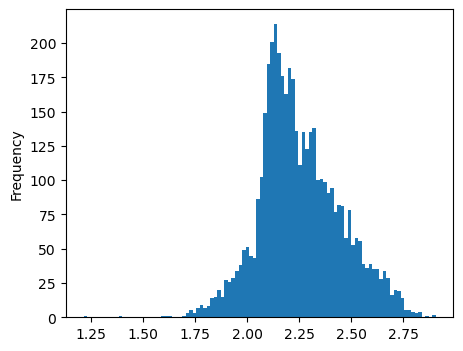

In [7]:
plt.subplots(figsize=(5,4), dpi=100)
savers_rank_df['total_score'].plot.hist(bins=100)

The above graph shows the distribution of the 'total_score' generated by the 3rd model. As you can see it closely resembles a normal distribution, which shows the algorithm generates well distributed results, not majorly skewed or biased. This is important for the bank as it makes it easier to identify who to offer savings accounts to based on the values that make up the algorithm. This is because it is easy to manipulate a distribution close to normal in order to visualise the amount of data points say in the top 5 or 10% to offer a savings plan to these accounts, compared to the entirety of the data set.

### Model 4

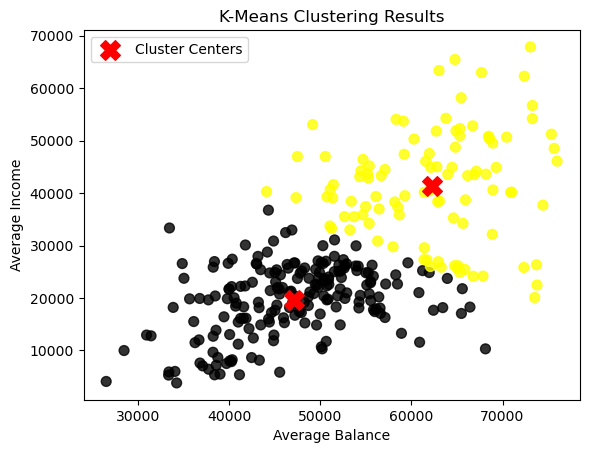

In [8]:
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=cluster_data, cmap=cmap, s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.title("K-Means Clustering Results")
plt.xlabel('Average Balance')
plt.ylabel('Average Income')
plt.legend()
plt.show()

The above k-means cluster shows the results for model 4, showing the distributions of data points for average income and balance against the two centers representing standard cards (black) and gold cards (yellow). In general, the model shows a small relationship between the variables and type of card, as there is no clear seperation between the groups of data. However, one useful takeaway for the bank would be the large number of data points around the standard card cluster center, suggesting that if someone applying for a card had the income and balance that would be close to this center, it would be potentially the best option to give them a standard card.

### Model 5

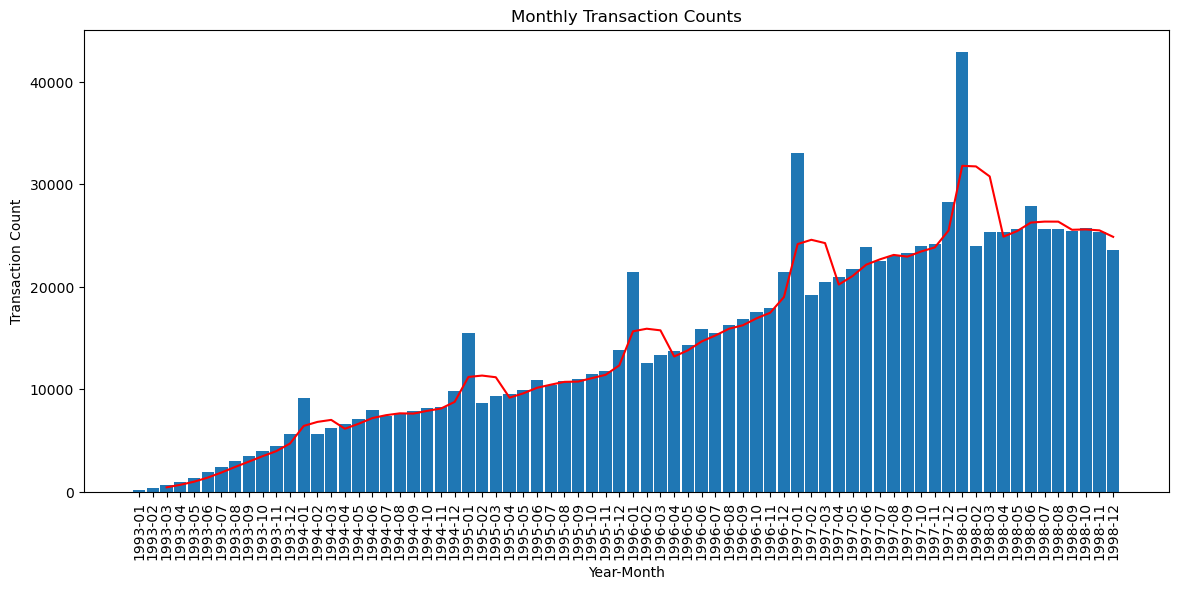

In [9]:
plt.figure(figsize=(14, 6))
plt.bar(monthly_transaction_counts.index, monthly_transaction_counts['transaction_count'], width=0.9)

monthly_transaction_counts['rolling_avg'] = monthly_transaction_counts['transaction_count'].rolling(window=3).mean()
plt.plot(monthly_transaction_counts.index, monthly_transaction_counts['rolling_avg'], color='red', label='3-Month Rolling Avg')
#creates a 3 month rolling average for the amount of transactions

plt.xticks(monthly_transaction_counts.index, [f"{y}-{m:02d}" for y, m in zip(monthly_transaction_counts['transaction_year'], monthly_transaction_counts['transaction_month'])], rotation='vertical')
# x axis labels

plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.title('Monthly Transaction Counts')

plt.show()

Model 5 shows that transactions peak significantly in the first month of every year, with a general increase in transactions across the bank's accounts through time. This could be helpful to the bank as they could use this information to run promotions during months that see typically lower transactions, such as cashback schemes, in order to boost transactions during those months, for example between the second and fourth months of the year.

## Conclusion

To summarise, the bank did not make adequate use of modern data science techniques to begin with, hampering the insights they were able to gain from their data and compromising their decision making processes. By making use of the models I have implemented they would be able to rectify this. For example, by making use of the first model, the bank would be able to risk assess a customer when they have applied for a loan, with the model using a safety first approach when approving a potential loanee. The second model provides significant results as it shows a clear correlation between having a card and having a higher average income. This could be important for the bank as it means they would be able to target higher income individuals without a card, and offer them one, with an increased chance of the client accepting, securing repeat business, something that I would recommend they follow through with. Another significant set of results for the bank would be those provided by the fifth model, with it showing where the number of transactions peak in a year, along with the overall long term trends for the bank. Using this model, I can recommend to the bank that running some form of promotion, such as  a cashback scheme, during the first half of the year after January would be especially beneficial in order to increase transaction levels. Ethical considerations for the bank would be ensuring they have their clients’ consent to use their data for analysis purposes and ensuring that the data is completely secure and complies with regulations like GDPR (General Data Protection Regulation) which would not only be applicable in general, but in scenarios like this where new databases are created and data analysis models are fed with information.